#### Installing packages

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
def create_train_test_split(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42069)
    return X_train, X_test, Y_train, Y_test
import re

plot-confusion-matrix function from class

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

function assigning numeric representation of MBTItype according to predictions based on the four binary models

In [3]:
def numMBTItype(row):
    if row['EI'] == 1:
        if row['NS'] == 1:
            if row['FT'] == 1:
                if row['PJ'] == 1:
                    return 7 # ENFP
                else: # ENFJ
                    return 5
            else: 
                if row['PJ'] == 1:
                    return 1 # ENTP
                else: # ENTJ
                    return 4
        else: 
            if row['FT'] == 1:
                if row['PJ'] == 1:
                    return 13 # ESFP
                else: # ESFJ
                    return 15
            else: 
                if row['PJ'] == 1:
                    return 12 # ESTP
                else: # ESTJ
                    return 14
    else: 
        if row['NS'] == 1:
            if row['FT'] == 1:
                if row['PJ'] == 1:
                    return 6 # INFP
                else: # INFJ
                    return 0
            else: 
                if row['PJ'] == 1:
                    return 2 # INTP
                else: # INTJ
                    return 3
        else: 
            if row['FT'] == 1:
                if row['PJ'] == 1:
                    return 8 # ISFP
                else: # ISFJ
                    return 10
            else: 
                if row['PJ'] == 1:
                    return 9 # ISTP
                else: # ISTJ
                    return 11

In [4]:
def MBTItype(row):
    if row['EI'] == 1:
        if row['NS'] == 1:
            if row['FT'] == 1:
                if row['PJ'] == 1:
                    return 'ENFP'
                else:
                    return 'ENFJ'
            else: 
                if row['PJ'] == 1:
                    return 'ENTP'
                else:
                    return 'ENTJ'
        else: 
            if row['FT'] == 1:
                if row['PJ'] == 1:
                    return 'ESFP'
                else:
                    return 'ESFJ'
            else: 
                if row['PJ'] == 1:
                    return 'ESTP'
                else:
                    return 'ESTJ'
    else: 
        if row['NS'] == 1:
            if row['FT'] == 1:
                if row['PJ'] == 1:
                    return 'INFP'
                else:
                    return 'INFJ'
            else: 
                if row['PJ'] == 1:
                    return 'INTP'
                else:
                    return 'INTJ'
        else: 
            if row['FT'] == 1:
                if row['PJ'] == 1:
                    return 'ISFP'
                else:
                    return 'ISFJ'
            else: 
                if row['PJ'] == 1:
                    return 'ISTP'
                else:
                    return 'ISTJ'

#### Load preprocessed Data Frame

In [5]:
df = pd.read_csv('mbti_preprocessed_complete.csv')
display(df.head())

Unnamed: 0  type                                              posts  \
0           0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1           1  ENTP  'I'm finding the lack of me in these posts ver...   
2           2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3           3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4           4  ENTJ  'You're fired.|||That's another silly misconce...   

   encodedType                                 preprocessed_posts  \
0            8  ['youtube', 'tumblr', 'enfp', 'intj', 'moment'...   
1            3  ['im', 'finding', 'the', 'lack', 'of', 'post',...   
2           11  ['good', 'one', 'youtube', 'of', 'course', 'i'...   
3           10  ['dear', 'intp', 'i', 'enjoyed', 'conversation...   
4            2  ['youre', 'fired', 'thats', 'another', 'silly'...   

   extro_intro  intu_obs  feel_think  prosp_judg  
0            0         1           1           0  
1            1         1           0           1  
2            0         1           0           1  
3            0         1           0           0  
4            1         1           0           0

Select columns which will serve as target and training data. Here target is the 16 MBTI categories. While the training data consists of the preprocessed posts which will be verctorized using TF-IDF.

In [6]:
X = df.iloc[:,4].values
Y_EI = df.iloc[:,5].values # E Extroverted (1) - I Introverted (0)
Y_NS = df.iloc[:,6].values # N Intuitive (1) - S Observant (0)
Y_FT = df.iloc[:,7].values # F Feeling (1) - T Thinking (0)
Y_PJ = df.iloc[:,8].values # P Prospective (1) - J Judging (0)
print('Extroverted (1) - Introverted (0)')
display(pd.DataFrame(Y_EI).value_counts())
print('Intuitive (1) -  Observant (0)')
display(pd.DataFrame(Y_NS).value_counts())
print('Feeling (1) - Thinking (0)')
display(pd.DataFrame(Y_FT).value_counts())
print('Prospective (1) - Judging (0)')
display(pd.DataFrame(Y_PJ).value_counts())

tf_idf_vectorizer = TfidfVectorizer(use_idf=True, min_df = 0.1, max_df = 0.3)

X = tf_idf_vectorizer.fit_transform(X).toarray()

Extroverted (1) - Introverted (0)


0    6676
1    1999
dtype: int64

Intuitive (1) -  Observant (0)


1    7478
0    1197
dtype: int64

Feeling (1) - Thinking (0)


1    4694
0    3981
dtype: int64

Prospective (1) - Judging (0)


1    5241
0    3434
dtype: int64

Split into train and test datasets.

In [7]:
X_train, X_test, Y_train_EI, Y_test_EI = create_train_test_split(X, Y_EI)
X_train, X_test, Y_train_NS, Y_test_NS = create_train_test_split(X, Y_NS)
X_train, X_test, Y_train_FT, Y_test_FT = create_train_test_split(X, Y_FT)
X_train, X_test, Y_train_PJ, Y_test_PJ = create_train_test_split(X, Y_PJ)

### Model: Centroides 
Load packages

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

from sklearn.neighbors import NearestCentroid
ncc = NearestCentroid()

##### EI: Extroverted - Introverted
Fit Model and determine Accuracy

In [9]:
ncc.fit(X_train, Y_train_EI)
predict_EI = ncc.predict(X_test)

In [10]:
print("Classification Report:")
print(classification_report(Y_test_EI, predict_EI, target_names=['I','E']))

Classification Report:
              precision    recall  f1-score   support

           I       0.88      0.81      0.84      2002
           E       0.50      0.63      0.56       601

    accuracy                           0.77      2603
   macro avg       0.69      0.72      0.70      2603
weighted avg       0.79      0.77      0.78      2603



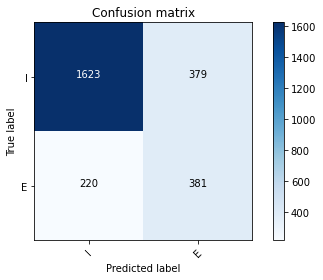

In [11]:
# ploted after Centroids Model
cnf = confusion_matrix(Y_test_EI, predict_EI)
#print(cnf)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = ['I','E'])

##### NS: Intuitive - Observant
Fit Model and determine Accuracy

In [12]:
ncc.fit(X_train, Y_train_NS)
predict_NS = ncc.predict(X_test)

In [13]:
print("Classification Report:")
print(classification_report(Y_test_NS, predict_NS, target_names=['S','N']))

Classification Report:
              precision    recall  f1-score   support

           S       0.40      0.62      0.49       342
           N       0.94      0.86      0.90      2261

    accuracy                           0.83      2603
   macro avg       0.67      0.74      0.69      2603
weighted avg       0.87      0.83      0.84      2603



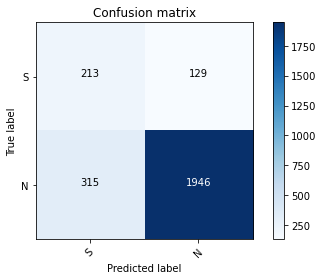

In [14]:
cnf = confusion_matrix(Y_test_NS, predict_NS)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = ['S','N'])

##### FT: Feeling - Thinking
Fit Model and determine Accuracy

In [15]:
ncc.fit(X_train, Y_train_FT)
predict_FT = ncc.predict(X_test)

In [16]:
print("Classification Report:")
print(classification_report(Y_test_FT, predict_FT, target_names=['T','F']))

Classification Report:
              precision    recall  f1-score   support

           T       0.76      0.76      0.76      1199
           F       0.80      0.80      0.80      1404

    accuracy                           0.78      2603
   macro avg       0.78      0.78      0.78      2603
weighted avg       0.78      0.78      0.78      2603



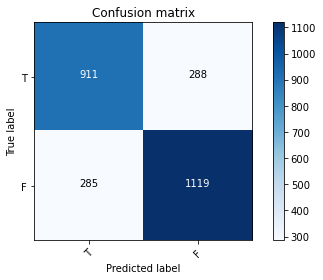

In [17]:
cnf = confusion_matrix(Y_test_FT, predict_FT)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = ['T','F'])

##### PJ: Prospective - Judging
Fit Model and determine Accuracy

In [18]:
ncc.fit(X_train, Y_train_PJ)
predict_PJ = ncc.predict(X_test)

In [19]:
print("Classification Report:")
print(classification_report(Y_test_PJ, predict_PJ, target_names=['J','P']))

Classification Report:
              precision    recall  f1-score   support

           J       0.68      0.67      0.67      1071
           P       0.77      0.78      0.78      1532

    accuracy                           0.73      2603
   macro avg       0.73      0.72      0.73      2603
weighted avg       0.73      0.73      0.73      2603



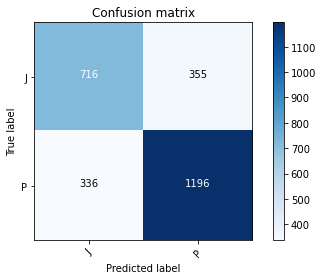

In [20]:
cnf = confusion_matrix(Y_test_PJ, predict_PJ)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = ['J','P'])

### Combining the results from the four models.

In [21]:
predict = pd.merge(pd.DataFrame(predict_EI).reset_index(), pd.DataFrame(predict_NS).reset_index(), on = "index")
predict.columns =['index', 'EI', 'NS']
predict = pd.merge(predict, pd.DataFrame(predict_FT).reset_index(), on = "index")
predict = pd.merge(predict, pd.DataFrame(predict_PJ).reset_index(), on = "index")
predict = predict.drop('index', axis = 1)
predict.columns =['EI', 'NS', 'FT', 'PJ']
display(predict.head())

test = pd.merge(pd.DataFrame(Y_test_EI).reset_index(), pd.DataFrame(Y_test_NS).reset_index(), on = "index")
test.columns =['index', 'EI', 'NS']
test = pd.merge(test, pd.DataFrame(Y_test_FT).reset_index(), on = "index")
test = pd.merge(test, pd.DataFrame(Y_test_PJ).reset_index(), on = "index")
test = test.drop('index', axis = 1)
test.columns =['EI', 'NS', 'FT', 'PJ']
display(test.head())

EI  NS  FT  PJ
0   1   1   1   0
1   1   0   0   1
2   0   1   0   1
3   0   0   0   0
4   0   1   0   0

EI  NS  FT  PJ
0   1   1   1   0
1   0   1   0   1
2   1   1   0   0
3   0   1   0   1
4   0   1   0   0

In [22]:
predict['predict_numType'] = predict.apply(lambda row: numMBTItype(row), axis = 1)
predict['predict_Type'] = predict.apply(lambda row: MBTItype(row), axis = 1)

test['test_numType'] = test.apply(lambda row: numMBTItype(row), axis = 1)
test['test_Type'] = test.apply(lambda row: MBTItype(row), axis = 1)

In [23]:
display(predict)
display(predict["predict_numType"].unique())

print("Classification Report:")
print(classification_report(test['test_numType'], predict["predict_numType"], target_names=test['test_Type'].unique()))

EI  NS  FT  PJ  predict_numType predict_Type
0      1   1   1   0                5         ENFJ
1      1   0   0   1               12         ESTP
2      0   1   0   1                2         INTP
3      0   0   0   0               11         ISTJ
4      0   1   0   0                3         INTJ
...   ..  ..  ..  ..              ...          ...
2598   0   1   0   1                2         INTP
2599   0   1   1   1                6         INFP
2600   1   1   1   0                5         ENFJ
2601   0   1   0   1                2         INTP
2602   0   1   0   1                2         INTP

[2603 rows x 6 columns]

array([ 5, 12,  2, 11,  3,  7,  6, 10,  1,  9,  0,  8, 14,  4, 13, 15])

Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.50      0.39      0.44       436
        INTP       0.54      0.57      0.55       196
        ENTJ       0.52      0.41      0.46       378
        INTJ       0.52      0.43      0.47       365
        INFP       0.22      0.26      0.24        74
        ISFP       0.15      0.24      0.18        55
        ISFJ       0.50      0.57      0.54       545
        ENFP       0.38      0.23      0.28       212
        INFJ       0.26      0.30      0.28        73
        ISTP       0.47      0.42      0.44        86
        ENTP       0.29      0.33      0.31        58
        ESTP       0.17      0.15      0.16        61
        ESTJ       0.09      0.29      0.13        28
        ISTJ       0.00      0.00      0.00        14
        ESFP       0.01      0.09      0.02        11
        ESFJ       0.05      0.18      0.08        11

    accuracy                           0.42      2603
   

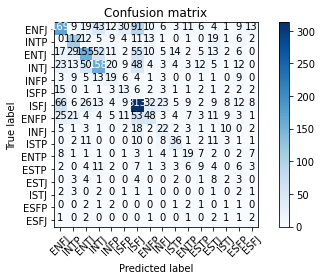

In [24]:
# ploted after Centroids Model
cnf = confusion_matrix(test['test_numType'], predict['predict_numType'])
#print(cnf)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = test['test_Type'].unique())

### Model: KNN
Load packages

In [25]:
from sklearn.neighbors import KNeighborsClassifier

##### EI: Extroverted - Introverted
Fit Model and determine Accuracy

Classification Report k=10:
              precision    recall  f1-score   support

           I       0.82      0.96      0.89      2002
           E       0.70      0.30      0.42       601

    accuracy                           0.81      2603
   macro avg       0.76      0.63      0.65      2603
weighted avg       0.79      0.81      0.78      2603



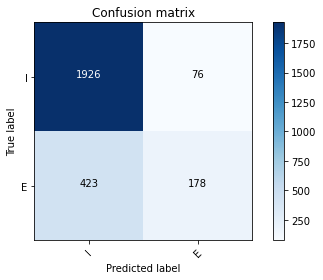

Classification Report k=15:
              precision    recall  f1-score   support

           I       0.83      0.95      0.89      2002
           E       0.69      0.37      0.48       601

    accuracy                           0.82      2603
   macro avg       0.76      0.66      0.68      2603
weighted avg       0.80      0.82      0.79      2603



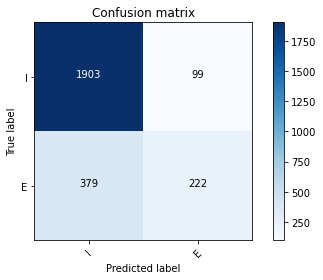

Classification Report k=20:
              precision    recall  f1-score   support

           I       0.82      0.96      0.89      2002
           E       0.70      0.32      0.44       601

    accuracy                           0.81      2603
   macro avg       0.76      0.64      0.66      2603
weighted avg       0.80      0.81      0.78      2603



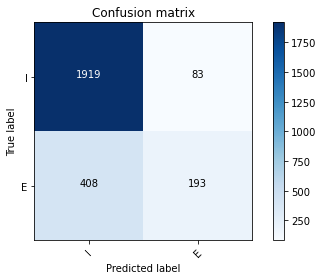

In [26]:
for k in range(10,21,5):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, Y_train_EI)
    predict_EI = knn.predict(X_test)
    print(f"Classification Report k={k}:")
    print(classification_report(Y_test_EI, predict_EI, target_names=['I','E']))
    cnf = confusion_matrix(Y_test_EI, predict_EI)
    np.set_printoptions(precision = 2)
    plot_confusion_matrix(cnf, classes = ['I','E'])

##### NS: Intuitive - Observant
Fit Model and determine Accuracy

Classification Report k=10:
              precision    recall  f1-score   support

           S       0.55      0.40      0.46       342
           N       0.91      0.95      0.93      2261

    accuracy                           0.88      2603
   macro avg       0.73      0.68      0.70      2603
weighted avg       0.87      0.88      0.87      2603



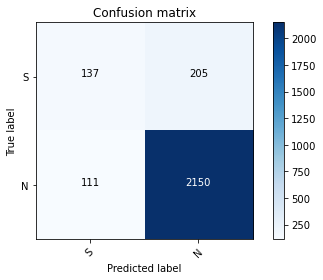

Classification Report k=15:
              precision    recall  f1-score   support

           S       0.65      0.30      0.41       342
           N       0.90      0.98      0.94      2261

    accuracy                           0.89      2603
   macro avg       0.78      0.64      0.68      2603
weighted avg       0.87      0.89      0.87      2603



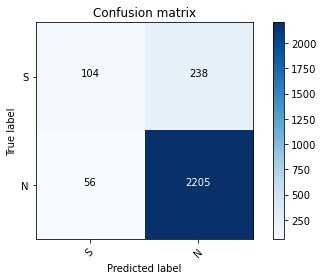

Classification Report k=20:
              precision    recall  f1-score   support

           S       0.68      0.33      0.44       342
           N       0.91      0.98      0.94      2261

    accuracy                           0.89      2603
   macro avg       0.79      0.65      0.69      2603
weighted avg       0.88      0.89      0.87      2603



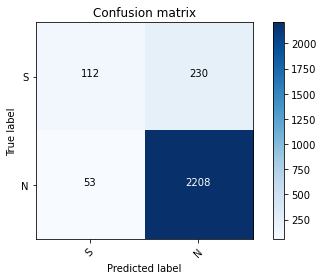

In [27]:
for k in range(10,21,5):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, Y_train_NS)
    predict_NS = knn.predict(X_test)
    print(f"Classification Report k={k}:")
    print(classification_report(Y_test_NS, predict_NS, target_names=['S','N']))
    cnf = confusion_matrix(Y_test_NS, predict_NS)
    np.set_printoptions(precision = 2)
    plot_confusion_matrix(cnf, classes = ['S','N'])

##### FT: Feeling - Thinking
Fit Model and determine Accuracy

Classification Report k=10:
              precision    recall  f1-score   support

           T       0.66      0.75      0.70      1199
           F       0.76      0.67      0.71      1404

    accuracy                           0.70      2603
   macro avg       0.71      0.71      0.70      2603
weighted avg       0.71      0.70      0.71      2603



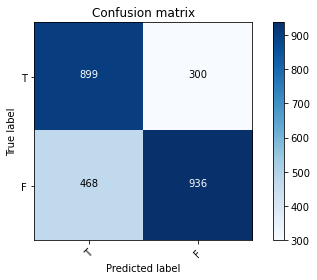

Classification Report k=15:
              precision    recall  f1-score   support

           T       0.72      0.66      0.69      1199
           F       0.73      0.78      0.75      1404

    accuracy                           0.72      2603
   macro avg       0.72      0.72      0.72      2603
weighted avg       0.72      0.72      0.72      2603



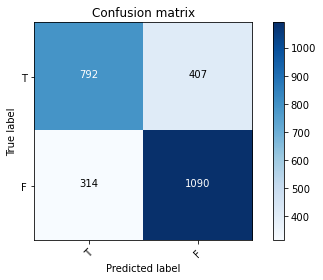

Classification Report k=20:
              precision    recall  f1-score   support

           T       0.71      0.69      0.70      1199
           F       0.74      0.76      0.75      1404

    accuracy                           0.73      2603
   macro avg       0.73      0.73      0.73      2603
weighted avg       0.73      0.73      0.73      2603



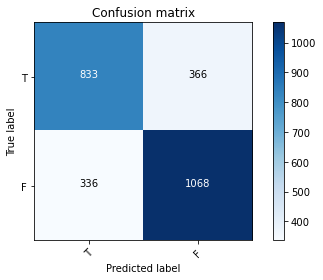

In [28]:
for k in range(10,21,5):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, Y_train_FT)
    predict_FT = knn.predict(X_test)
    print(f"Classification Report k={k}:")
    print(classification_report(Y_test_FT, predict_FT, target_names=['T','F']))
    cnf = confusion_matrix(Y_test_FT, predict_FT)
    np.set_printoptions(precision = 2)
    plot_confusion_matrix(cnf, classes = ['T','F'])

##### PJ: Prospective - Judging
Fit Model and determine Accuracy

Classification Report k=10:
              precision    recall  f1-score   support

           J       0.62      0.46      0.53      1071
           P       0.68      0.80      0.74      1532

    accuracy                           0.66      2603
   macro avg       0.65      0.63      0.63      2603
weighted avg       0.66      0.66      0.65      2603



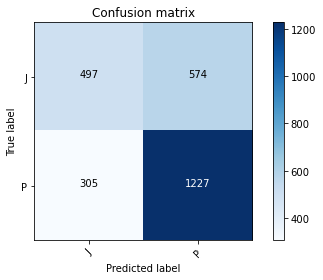

Classification Report k=15:
              precision    recall  f1-score   support

           J       0.68      0.39      0.50      1071
           P       0.67      0.87      0.76      1532

    accuracy                           0.67      2603
   macro avg       0.68      0.63      0.63      2603
weighted avg       0.68      0.67      0.65      2603



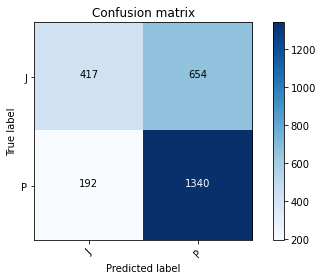

Classification Report k=20:
              precision    recall  f1-score   support

           J       0.69      0.45      0.54      1071
           P       0.69      0.86      0.76      1532

    accuracy                           0.69      2603
   macro avg       0.69      0.65      0.65      2603
weighted avg       0.69      0.69      0.67      2603



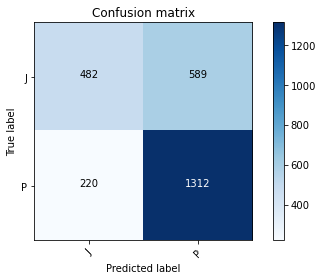

In [29]:
for k in range(10,21,5):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, Y_train_PJ)
    predict_PJ = knn.predict(X_test)
    print(f"Classification Report k={k}:")
    print(classification_report(Y_test_PJ, predict_PJ, target_names=['J','P']))
    cnf = confusion_matrix(Y_test_PJ, predict_PJ)
    np.set_printoptions(precision = 2)
    plot_confusion_matrix(cnf, classes = ['J','P'])

### Combining the results from the four models.

In [30]:
predict = pd.merge(pd.DataFrame(predict_EI).reset_index(), pd.DataFrame(predict_NS).reset_index(), on = "index")
predict.columns =['index', 'EI', 'NS']
predict = pd.merge(predict, pd.DataFrame(predict_FT).reset_index(), on = "index")
predict = pd.merge(predict, pd.DataFrame(predict_PJ).reset_index(), on = "index")
predict = predict.drop('index', axis = 1)
predict.columns =['EI', 'NS', 'FT', 'PJ']
display(predict.head())

test = pd.merge(pd.DataFrame(Y_test_EI).reset_index(), pd.DataFrame(Y_test_NS).reset_index(), on = "index")
test.columns =['index', 'EI', 'NS']
test = pd.merge(test, pd.DataFrame(Y_test_FT).reset_index(), on = "index")
test = pd.merge(test, pd.DataFrame(Y_test_PJ).reset_index(), on = "index")
test = test.drop('index', axis = 1)
test.columns =['EI', 'NS', 'FT', 'PJ']
display(test.head())

EI  NS  FT  PJ
0   1   1   1   0
1   0   1   1   1
2   0   1   0   1
3   0   1   0   1
4   0   1   0   1

EI  NS  FT  PJ
0   1   1   1   0
1   0   1   0   1
2   1   1   0   0
3   0   1   0   1
4   0   1   0   0

In [31]:
predict['predict_numType'] = predict.apply(lambda row: numMBTItype(row), axis = 1)
predict['predict_Type'] = predict.apply(lambda row: MBTItype(row), axis = 1)

test['test_numType'] = test.apply(lambda row: numMBTItype(row), axis = 1)
test['test_Type'] = test.apply(lambda row: MBTItype(row), axis = 1)

In [32]:
display(predict)
display(predict["predict_numType"].unique())

print("Classification Report:")
print(classification_report(test['test_numType'], predict["predict_numType"], target_names=test['test_Type'].unique()))

EI  NS  FT  PJ  predict_numType predict_Type
0      1   1   1   0                5         ENFJ
1      0   1   1   1                6         INFP
2      0   1   0   1                2         INTP
3      0   1   0   1                2         INTP
4      0   1   0   1                2         INTP
...   ..  ..  ..  ..              ...          ...
2598   0   1   0   1                2         INTP
2599   0   1   0   1                2         INTP
2600   0   1   0   1                2         INTP
2601   0   1   0   1                2         INTP
2602   0   1   1   1                6         INFP

[2603 rows x 6 columns]

array([ 5,  6,  2,  7,  0,  3,  8,  1, 10, 11,  9,  4, 12])

Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.41      0.31      0.35       436
        INTP       0.65      0.44      0.53       196
        ENTJ       0.33      0.58      0.42       378
        INTJ       0.44      0.30      0.36       365
        INFP       0.65      0.30      0.41        74
        ISFP       0.52      0.25      0.34        55
        ISFJ       0.38      0.64      0.47       545
        ENFP       0.39      0.13      0.19       212
        INFJ       0.50      0.26      0.34        73
        ISTP       0.58      0.34      0.43        86
        ENTP       0.49      0.41      0.45        58
        ESTP       0.53      0.13      0.21        61
        ESTJ       0.54      0.25      0.34        28
        ISTJ       0.00      0.00      0.00        14
        ESFP       0.00      0.00      0.00        11
        ESFJ       0.00      0.00      0.00        11

    accuracy                           0.40      2603
   

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


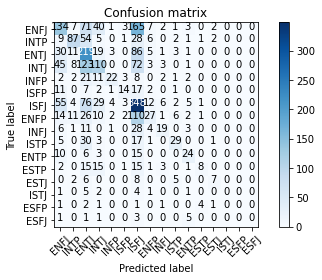

In [33]:
# ploted after Centroids Model
cnf = confusion_matrix(test['test_numType'], predict['predict_numType'])
#print(cnf)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = test['test_Type'].unique())